### WQU Capstone: Impact of COVID-19 on Local Markets
#### Version: 1.0
##### Name: Raymond Lazarus Kafambe
###### Email: raymond.kafambe@icloud.com

In [65]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.vector_ar.var_model import VAR

In [66]:
def fetch_market_data(symbols, start_date, end_date):
    """
    Fetch historical market data from Yahoo Finance.

    Parameters:
    - symbols: List of stock symbols or tickers.
    - start_date: Start date for data collection (format: "YYYY-MM-DD").
    - end_date: End date for data collection (format: "YYYY-MM-DD").

    Returns:
    - List of DataFrames containing historical market data for each symbol.
    """
    market_data = []
    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        market_data.append(data)
    return market_data

In [67]:
def perform_eda(data, title, covid_start_date, covid_end_date):
    """
    Perform exploratory data analysis (EDA) on market data.

    Parameters:
    - data: DataFrame containing historical market data.
    - title: Title for the plot.
    - covid_start_date: Start date of the COVID-19 pandemic.
    - covid_end_date: End date of the COVID-19 pandemic.

    Returns:
    - None (displays summary statistics and plots).
    """
    # Display summary statistics
    print("Summary Statistics for", title, ":")
    print(data.describe())

    # Plot closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='blue')
    plt.title('Closing Price - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Volume'], color='red')
    plt.title('Trading Volume - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Initial inferences
    pre_6m_data = data[data.index >= pd.to_datetime(covid_start_date) - pd.DateOffset(months=6)]
    pre_covid_data = data[(data.index >= pd.to_datetime(covid_start_date) - pd.DateOffset(months=6)) & (data.index < covid_start_date)]
    during_covid_data = data[(data.index >= covid_start_date) & (data.index <= covid_end_date)]
    post_covid_data = data[data.index > covid_end_date]

    print("Initial Inferences for", title, ":")
    print("- 6 Months before COVID-19 pandemic:")
    print(pre_6m_data.describe())
    print("- Before COVID-19 pandemic:")
    print(pre_covid_data.describe())
    print("- During COVID-19 pandemic:")
    print(during_covid_data.describe())
    print("- After COVID-19 pandemic:")
    print(post_covid_data.describe())
    print()


In [68]:
def perform_eda(data, title, covid_start_date, covid_end_date):
    """
    Perform exploratory data analysis (EDA) on market data.

    Parameters:
    - data: DataFrame containing historical market data.
    - title: Title for the plot.
    - covid_start_date: Start date of the COVID-19 pandemic.
    - covid_end_date: End date of the COVID-19 pandemic.

    Returns:
    - None (displays summary statistics and plots).
    """
    # Display summary statistics
    print("Summary Statistics for", title, ":")
    print(data.describe())

    # Plot closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='blue')
    plt.title('Closing Price - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Volume'], color='red')
    plt.title('Trading Volume - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Initial inferences
    pre_covid_data = data[data.index < covid_start_date]
    during_covid_data = data[(data.index >= covid_start_date) & (data.index <= covid_end_date)]
    post_covid_data = data[data.index > covid_end_date]

    print("Initial Inferences for", title, ":")
    print("- Before COVID-19 pandemic:")
    print(pre_covid_data.describe())
    print("- During COVID-19 pandemic:")
    print(during_covid_data.describe())
    print("- After COVID-19 pandemic:")
    print(post_covid_data.describe())
    print()

In [69]:
def apply_arima_model(data):
    """
    Apply Autoregressive Integrated Moving Average (ARIMA) model to analyze market data.

    Parameters:
    - data: DataFrame containing historical market data.

    Returns:
    - None (displays ARIMA model results).
    """
    # Implement ARIMA model
    # Example: ARIMA(1, 1, 1)
    model = ARIMA(data['Close'], order=(1, 1, 1))
    results = model.fit()

    # Display ARIMA model summary
    print("ARIMA Model Summary:")
    print(results.summary())

In [70]:
def apply_garch_model(data):
    """
    Apply Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model to analyze market data.

    Parameters:
    - data: DataFrame containing historical market data.

    Returns:
    - None (displays GARCH model results).
    """
    # Implement GARCH model
    model = arch_model(data['Close'], vol='GARCH')
    results = model.fit()

    # Display GARCH model summary
    print("GARCH Model Summary:")
    print(results.summary())

In [71]:
def apply_var_model(data):
    """
    Apply Vector Autoregression (VAR) model to analyze market data.

    Parameters:
    - data: DataFrame containing historical market data.

    Returns:
    - None (displays VAR model results).
    """
    # Implement VAR model
    model = VAR(data)
    results = model.fit()

    # Display VAR model summary
    print("VAR Model Summary:")
    print(results.summary())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Summary Statistics for S&P 500 :
              Open         High          Low        Close    Adj Close  \
count  2768.000000  2768.000000  2768.000000  2768.000000  2768.000000   
mean   2076.272282  2086.857052  2064.740615  2076.692679  2076.692679   
std     674.223824   677.084240   670.953893   674.089735   674.089735   
min    1027.650024  1032.949951  1010.909973  1022.580017  1022.580017   
25%    1413.089966  1418.964996  1405.944977  1413.327515  1413.327515   
50%    2049.979980  2062.880005  2041.570007  2050.875000  2050.875000   
75%    2657.380066  2674.734985  2638.384949  2656.442566  2656.442566   
max    3750.010010  3756.120117  3730.209961  3735.360107  3735.360107   

             Volume  
count  2.768000e+03  
mean   3.830034e+09  
std    9.426344e+08  
min    1.025000e+09  
25%    3.281112e+09  
50%    3.658110e+09  
75%    4.192858e+09  
max    1.061781e+10  


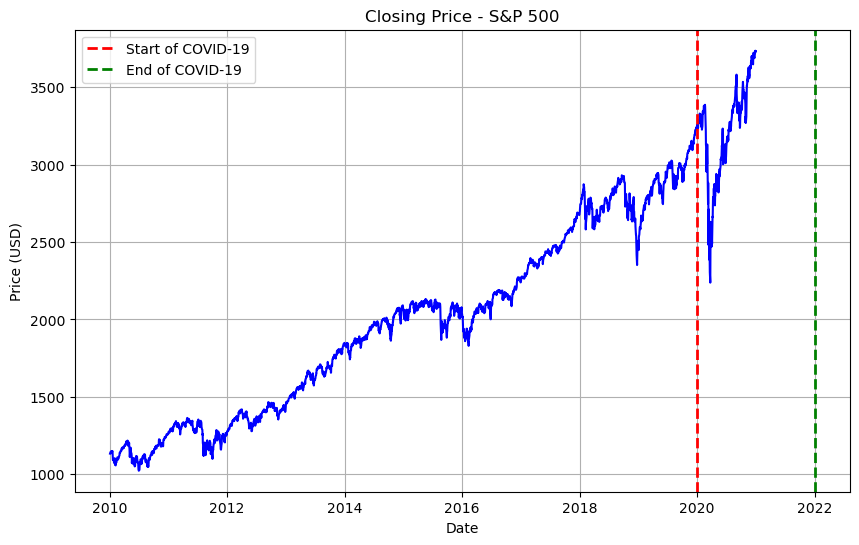

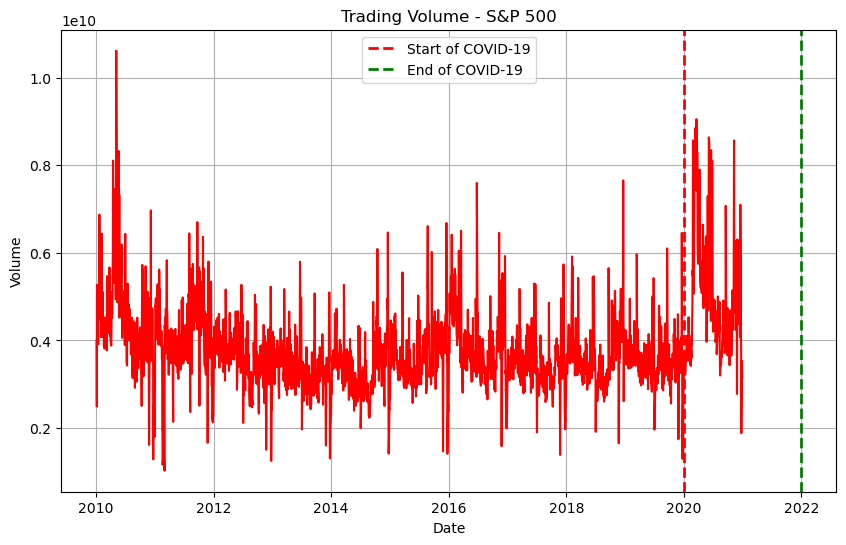

Initial Inferences for S&P 500 :
- Before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean   1962.147905  1971.346574  1952.200450  1962.608854  1962.608854   
std     589.031496   590.190988   587.623893   588.910251   588.910251   
min    1027.650024  1032.949951  1010.909973  1022.580017  1022.580017   
25%    1381.642548  1390.700012  1372.800018  1384.404999  1384.404999   
50%    1985.319946  1993.084961  1975.660034  1986.479980  1986.479980   
75%    2434.179932  2441.522522  2427.959961  2433.967529  2433.967529   
max    3247.229980  3247.929932  3234.370117  3240.020020  3240.020020   

             Volume  
count  2.516000e+03  
mean   3.719926e+09  
std    8.129706e+08  
min    1.025000e+09  
25%    3.244208e+09  
50%    3.595235e+09  
75%    4.078560e+09  
max    1.061781e+10  
- During COVID-19 pandemic:
              Open         High          Low  

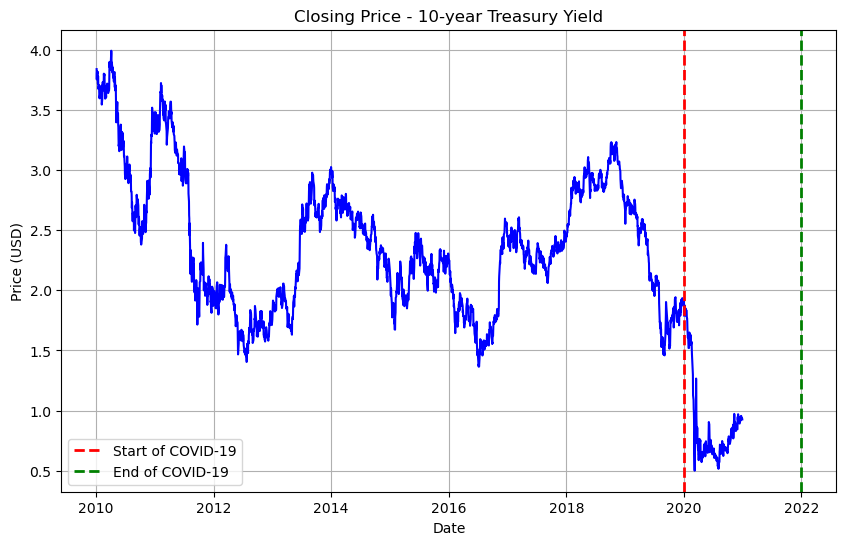

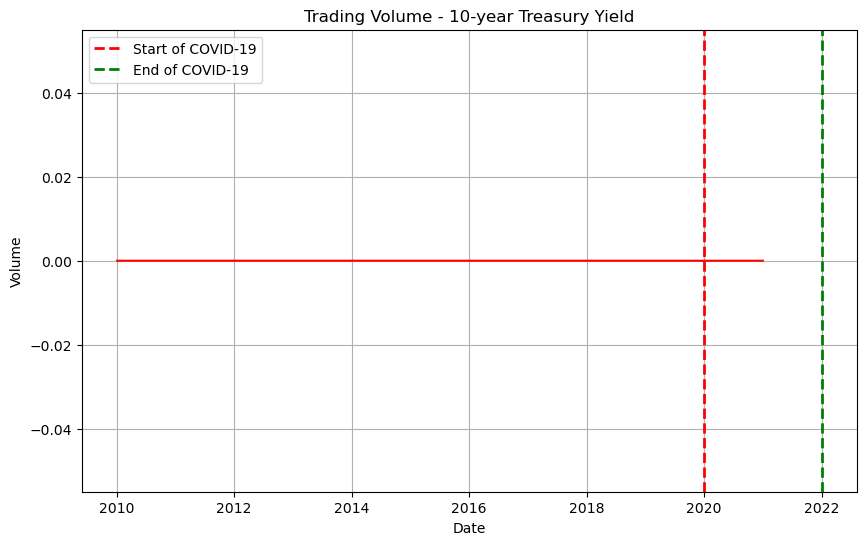

Initial Inferences for 10-year Treasury Yield :
- Before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  Volume
count  2514.000000  2514.000000  2514.000000  2514.000000  2514.000000  2514.0
mean      2.397016     2.422876     2.369505     2.395443     2.395443     0.0
std       0.554344     0.554856     0.552166     0.552921     0.552921     0.0
min       1.336000     1.395000     1.336000     1.366000     1.366000     0.0
25%       1.956000     1.981750     1.922000     1.954250     1.954250     0.0
50%       2.340000     2.365000     2.319000     2.342500     2.342500     0.0
75%       2.762750     2.781750     2.735750     2.755000     2.755000     0.0
max       3.964000     4.013000     3.947000     3.994000     3.994000     0.0
- During COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000   252.0
mean     0.880710    0.905282    0.85

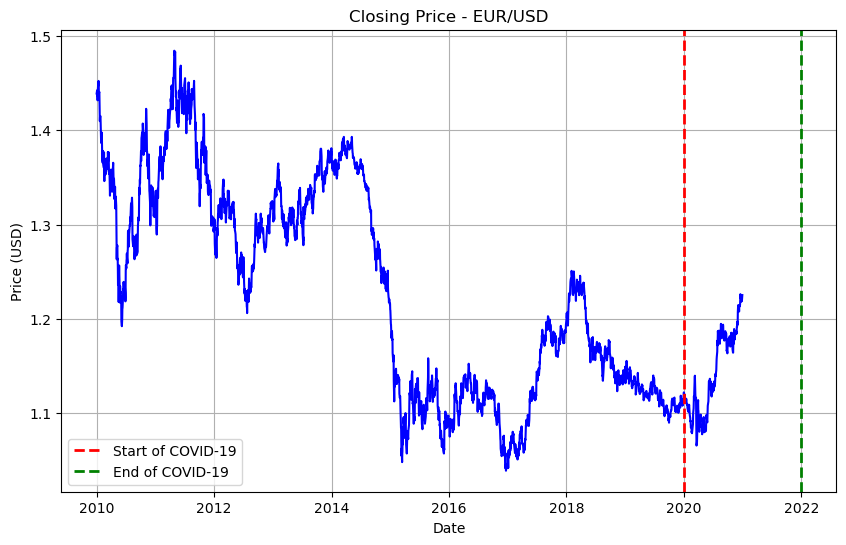

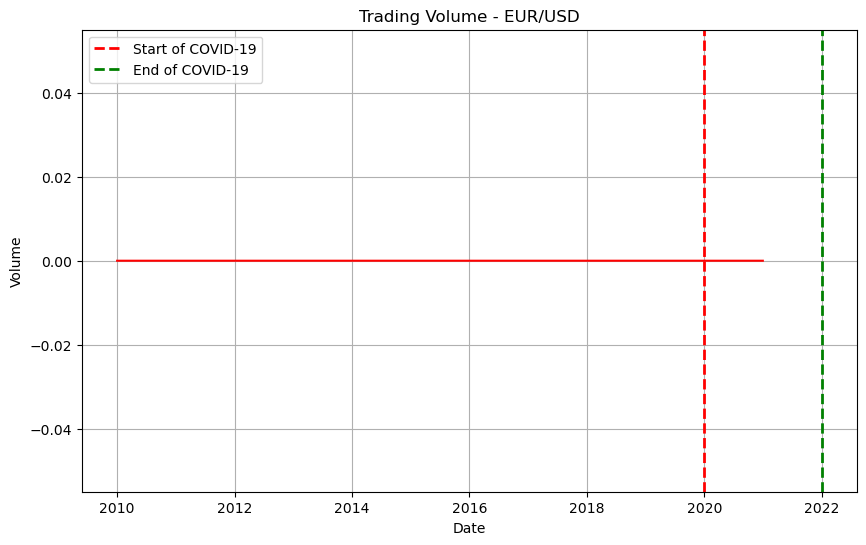

Initial Inferences for EUR/USD :
- Before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  Volume
count  2603.000000  2603.000000  2603.000000  2603.000000  2603.000000  2603.0
mean      1.231071     1.235449     1.226403     1.231027     1.231027     0.0
std       0.113341     0.113937     0.112937     0.113271     0.113271     0.0
min       1.039393     1.041992     0.760572     1.039047     1.039047     0.0
25%       1.123640     1.128000     1.120398     1.123671     1.123671     0.0
50%       1.229695     1.234568     1.225505     1.229559     1.229559     0.0
75%       1.332800     1.337278     1.327525     1.332889     1.332889     0.0
max       1.484296     1.493808     1.480494     1.484406     1.484406     0.0
- During COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  261.000000  261.000000  261.000000  261.000000  261.000000   261.0
mean     1.141452    1.145320    1.137795    1.14151

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2768
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12753.069
Date:                Tue, 30 Apr 2024   AIC                          25512.138
Time:                        07:00:35   BIC                          25529.914
Sample:                             0   HQIC                         25518.558
                               - 2768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4647      0.023    -20.213      0.000      -0.510      -0.420
ma.L1          0.2853      0.025     11.300      0.000       0.236       0.335
sigma2       589.9701      4.49

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.542e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2766
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4396.414
Date:                Tue, 30 Apr 2024   AIC                          -8786.828
Time:                        07:00:35   BIC                          -8769.053
Sample:                             0   HQIC                         -8780.408
                               - 2766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6415      0.263      2.439      0.015       0.126       1.157
ma.L1         -0.6651      0.255     -2.603      0.009      -1.166      -0.164
sigma2         0.0024   4.52e-0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2864
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10156.938
Date:                Tue, 30 Apr 2024   AIC                         -20307.876
Time:                        07:00:36   BIC                         -20289.997
Sample:                             0   HQIC                        -20301.429
                               - 2864                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4641      0.317     -1.464      0.143      -1.085       0.157
ma.L1          0.4293      0.324      1.325      0.185      -0.206       1.064
sigma2      4.853e-05   8.71e-0

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [73]:
if __name__ == "__main__":
    # Define parameters
    symbols = ["^GSPC", "^TNX", "EURUSD=X"]  # Example symbols: S&P 500, 10-year Treasury yield, EUR/USD
    titles = ["S&P 500", "10-year Treasury Yield", "EUR/USD"]

    start_date = "2010-01-01"
    end_date = "2020-12-31"

    covid_start_date = "2020-01-01"  # Modify start date of COVID-19 pandemic
    covid_end_date = "2021-12-31"  # Modify end date of COVID-19 pandemic

    # Fetch market data
    market_data = fetch_market_data(symbols, start_date, end_date)

    # Perform exploratory data analysis
    for i in range(len(market_data)):
        perform_eda(market_data[i], titles[i], covid_start_date, covid_end_date)
        
    # Apply statistical models
    for data, title in zip(market_data, titles):
        print("Applying Statistical Models for", title)
        apply_arima_model(data)
        apply_garch_model(data)
    #    apply_var_model(data)

#### Results Figures

In [42]:
import yfinance as yf

# Define the symbols for the major stock indices
symbols = ["^GSPC", "^IXIC", "^FTSE"]

# Define the start and end dates for data collection
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch market data
market_data = {}
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    market_data[symbol] = data

# Check the first few rows of each DataFrame
for symbol, data in market_data.items():
    print(f"First few rows of {symbol}:")
    print(data.head())
    print()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

First few rows of ^GSPC:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3257.850098   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3234.850098   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3246.280029   
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3237.179932   
2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049  3253.050049   

                Volume  
Date                    
2020-01-02  3459930000  
2020-01-03  3484700000  
2020-01-06  3702460000  
2020-01-07  3435910000  
2020-01-08  3726840000  

First few rows of ^IXIC:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  9039.459961  9093.429688  9010.889648  9092.190430

### VOLATILITY IN STOCK INDICES

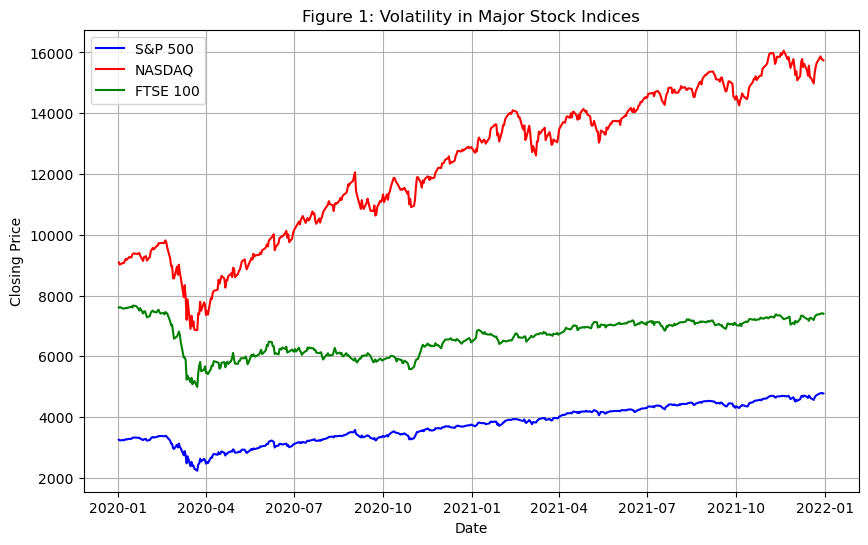

In [45]:
import matplotlib.pyplot as plt

# Plotting volatility in stock indices
plt.figure(figsize=(10, 6))

# Plot S&P 500
plt.plot(market_data['^GSPC'].index, market_data['^GSPC']['Close'], color='blue', label='S&P 500')

# Plot NASDAQ
plt.plot(market_data['^IXIC'].index, market_data['^IXIC']['Close'], color='red', label='NASDAQ')

# Plot FTSE 100
plt.plot(market_data['^FTSE'].index, market_data['^FTSE']['Close'], color='green', label='FTSE 100')

plt.title('Figure 1: Volatility in Major Stock Indices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()


#### VOLATILITY IN BOND MARKETS

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


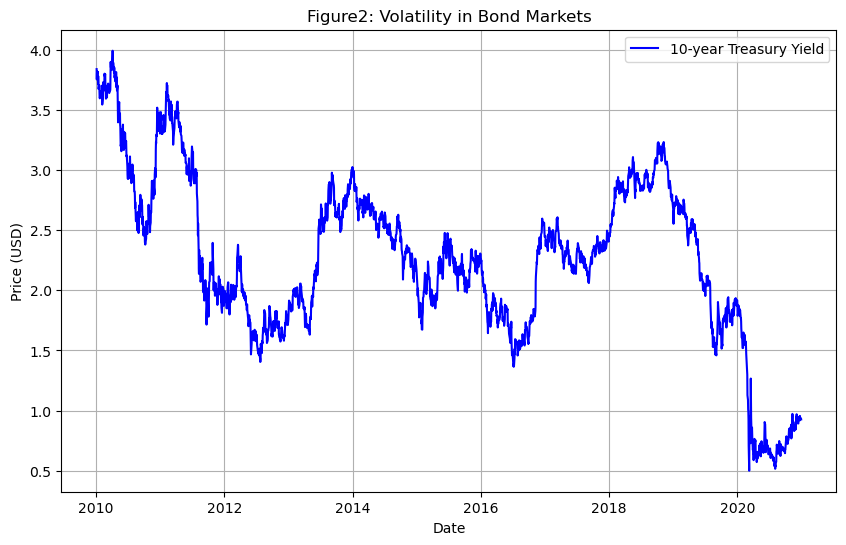

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbols to fetch data for
symbols = ["^GSPC", "^TNX", "EURUSD=X"]  # S&P 500, 10-year Treasury Yield, EUR/USD

# Define the start and end dates for the data
start_date = "2010-01-01"
end_date = "2020-12-31"

# Fetch market data
market_data = {}
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    market_data[symbol] = data

# Plot volatility in bond markets
plt.figure(figsize=(10, 6))
plt.plot(market_data['^TNX'].index, market_data['^TNX']['Close'], color='blue', label='10-year Treasury Yield')
plt.title('Figure2: Volatility in Bond Markets')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#### VOLTATILITY IN FX MARKETS

[*********************100%%**********************]  1 of 1 completed


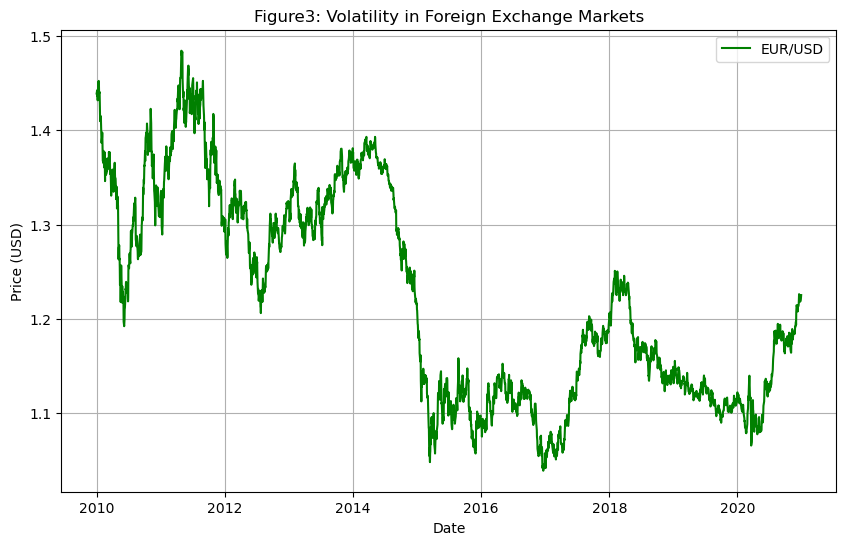

In [50]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbol for EUR/USD
eurusd_symbol = "EURUSD=X"

# Define the start and end dates for data collection
start_date = "2010-01-01"
end_date = "2020-12-31"

# Fetch market data for EUR/USD
eurusd_data = yf.download(eurusd_symbol, start=start_date, end=end_date)

# Plot volatility in foreign exchange markets
plt.figure(figsize=(10, 6))
plt.plot(eurusd_data.index, eurusd_data['Close'], color='green', label='EUR/USD')
plt.title('Figure3: Volatility in Foreign Exchange Markets')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


### STATISTICAL MODELS

In [74]:
for data, title in zip(market_data, titles):
        print("Applying Statistical Models for", title)
        apply_arima_model(data)
        apply_garch_model(data)
    #    apply_var_model(data)

Applying Statistical Models for S&P 500


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2768
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12753.069
Date:                Tue, 30 Apr 2024   AIC                          25512.138
Time:                        07:03:47   BIC                          25529.914
Sample:                             0   HQIC                         25518.558
                               - 2768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4647      0.023    -20.213      0.000      -0.510      -0.420
ma.L1          0.2853      0.025     11.300      0.000       0.236       0.335
sigma2       589.9701      4.49

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.542e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2766
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4396.414
Date:                Tue, 30 Apr 2024   AIC                          -8786.828
Time:                        07:03:48   BIC                          -8769.053
Sample:                             0   HQIC                         -8780.408
                               - 2766                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6415      0.263      2.439      0.015       0.126       1.157
ma.L1         -0.6651      0.255     -2.603      0.009      -1.166      -0.164
sigma2         0.0024   4.52e-0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2864
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10156.938
Date:                Tue, 30 Apr 2024   AIC                         -20307.876
Time:                        07:03:48   BIC                         -20289.997
Sample:                             0   HQIC                        -20301.429
                               - 2864                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4641      0.317     -1.464      0.143      -1.085       0.157
ma.L1          0.4293      0.324      1.325      0.185      -0.206       1.064
sigma2      4.853e-05   8.71e-0

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


1. #### GARCH

ValueError: x and y must have same first dimension, but have shapes (1,) and (30,)

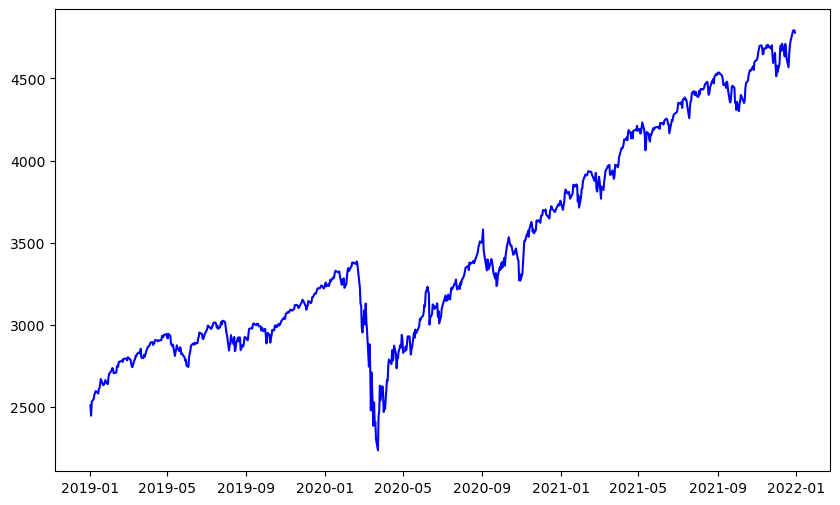

In [61]:
import matplotlib.pyplot as plt

# Assuming you have already fitted the GARCH model and obtained forecasted volatility
# Let's assume forecast_volatility contains the forecasted volatility data

# Extracting forecasted volatility values and corresponding dates
forecasted_volatility_values = forecast_volatility.mean.iloc[-1].values  # Adjust this according to your forecasted volatility data
forecasted_dates = forecast_volatility.mean.index

# Ensure forecasted_dates and forecasted_volatility_values have the same length
forecasted_dates = forecasted_dates[:len(forecasted_volatility_values)]

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Historical Data')
plt.plot(forecasted_dates, forecasted_volatility_values, color='red', label='Forecasted Volatility')
plt.title('Application of GARCH Model to Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### 2. ARIMA

[*********************100%%**********************]  1 of 1 completed
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with a

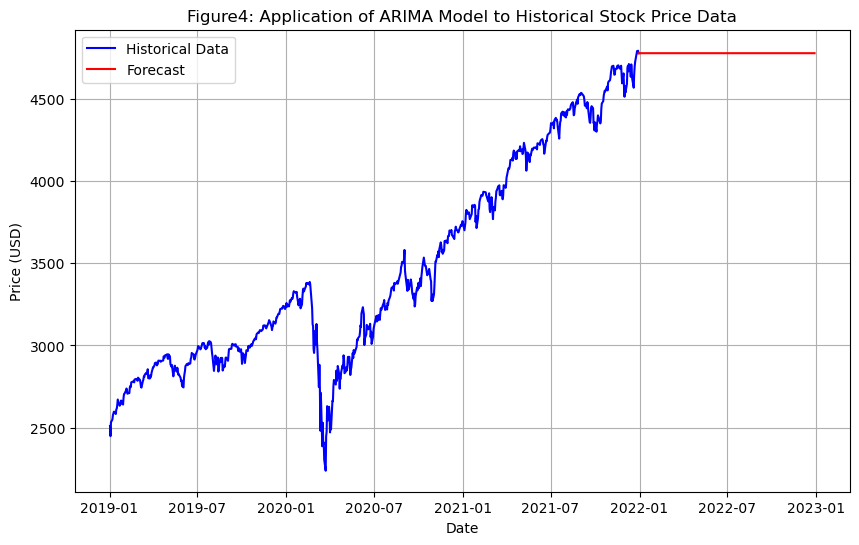

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define parameters
symbol = "^GSPC"  # Example symbol: S&P 500
title = "S&P 500"

start_date = "2019-01-01"
end_date = "2021-12-31"

# Fetch market data
data = yf.download(symbol, start=start_date, end=end_date)

# Apply ARIMA model
model = ARIMA(data['Close'], order=(5,1,0))  # ARIMA(5,1,0) model
model_fit = model.fit()

# Forecast future price movements
forecast = model_fit.forecast(steps=365)  # Forecasting 365 days into the future

# Plotting historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=365), forecast, color='red', label='Forecast')
plt.title('Figure4: Application of ARIMA Model to Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#### 3. VAR

In [62]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of time periods
n_periods = 100

# Generate dates for the time series
dates = pd.date_range(start='2020-01-01', periods=n_periods, freq='D')

# Generate dummy data for three variables: Variable1, Variable2, Variable3
data = pd.DataFrame({
    'Variable1': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable2': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable3': np.random.normal(loc=0, scale=1, size=n_periods)
}, index=dates)

# Display the first few rows of the generated data
print(data.head())


            Variable1  Variable2  Variable3
2020-01-01   1.764052   1.883151  -0.369182
2020-01-02   0.400157  -1.347759  -0.239379
2020-01-03   0.978738  -1.270485   1.099660
2020-01-04   2.240893   0.969397   0.655264
2020-01-05   1.867558  -1.173123   0.640132


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            Variable1  Variable2  Variable3
2020-01-01   1.764052   1.883151  -0.369182
2020-01-02   0.400157  -1.347759  -0.239379
2020-01-03   0.978738  -1.270485   1.099660
2020-01-04   2.240893   0.969397   0.655264
2020-01-05   1.867558  -1.173123   0.640132


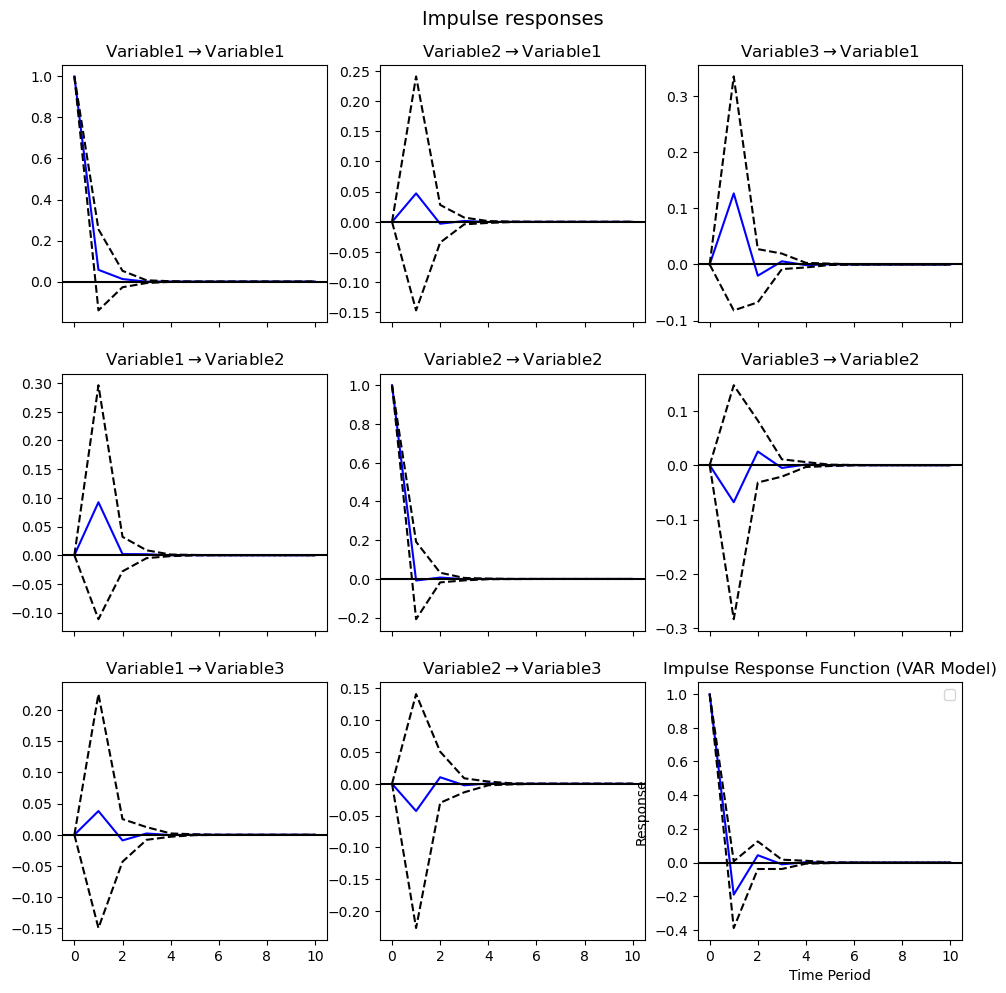

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of time periods
n_periods = 100

# Generate dates for the time series
dates = pd.date_range(start='2020-01-01', periods=n_periods, freq='D')

# Generate dummy data for three variables: Variable1, Variable2, Variable3
data = pd.DataFrame({
    'Variable1': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable2': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable3': np.random.normal(loc=0, scale=1, size=n_periods)
}, index=dates)

# Display the first few rows of the generated data
print(data.head())

# Fit VAR model to the data
model = VAR(data)
results = model.fit()

# Plotting the impulse response function for each variable
irf = results.irf(periods=10)  # Adjust the number of periods as needed
irf.plot()
plt.title('Impulse Response Function (VAR Model)')
plt.xlabel('Time Period')
plt.ylabel('Response')
plt.legend(loc='upper right')
plt.show()
